In [139]:
import pickle
import os
import torch

file_path = "all_h_all.pkl"

# Check if the file exists before loading
if os.path.exists(file_path):
    with open(file_path, "rb") as file:
        data = pickle.load(file)  # Load the pickle file
        print("File loaded successfully!")
else:
    print(f"Error: File '{file_path}' not found!")


File loaded successfully!


In [140]:
import torch

num_query = len(data)  # 0D
num_reasoning = len(data[0])  # 1D
num_layer = len(data[0][0])  # 2D
num_hidden = len(data[0][0][0])  # 3D

# Storing the values in lists
num_query_list = []
num_reasoning_list = []
num_layer_list = []
num_hidden_list = []

###
print("num_query")
num_query = len(data)
num_query_list.append(num_query)
# print(num_query)

###
print("num_reasoning")
for i in range(num_query):
    num_reasoning = len(data[i])
    num_reasoning_list.append(num_reasoning)
    # print(num_reasoning)

###
print("num_layer")
for i in range(num_query):
    for j in range(len(data[i])):  # Iterate over reasoning
        num_layer = len(data[i][j])
        num_layer_list.append(num_layer)
        # print(num_layer)

###
print("num_hidden")
for i in range(num_query):
    for j in range(len(data[i])):  # Iterate over reasoning
        for k in range(len(data[i][j])):  # Iterate over layers
            num_hidden = len(data[i][j][k])
            num_hidden_list.append(num_hidden)
            # print(num_hidden)

# Convert lists to torch tensors
num_query_tensor = torch.tensor(num_query_list)
num_reasoning_tensor = torch.tensor(num_reasoning_list)
num_layer_tensor = torch.tensor(num_layer_list)
num_hidden_tensor = torch.tensor(num_hidden_list)

# Print tensors
print("num_query_tensor:", num_query_tensor)
print("num_reasoning_tensor:", num_reasoning_tensor)
print("num_layer_tensor:", num_layer_tensor)
print("num_hidden_tensor:", num_hidden_tensor)


num_query
num_reasoning
num_layer
num_hidden
num_query_tensor: tensor([10])
num_reasoning_tensor: tensor([ 4,  3,  4,  5,  4,  4,  2, 17,  7,  4])
num_layer_tensor: tensor([29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29])
num_hidden_tensor: tensor([3584, 3584, 3584,  ..., 3584, 3584, 3584])


In [141]:
import torch

# Assuming data is a 4D list (num_query, num_reasoning, num_layer, num_hidden)
num_query = len(data)
num_reasoning = len(data[0])
num_layer = len(data[0][0])  # Total layers in the hierarchy

# Extract the last layer from each (query, reasoning) pair
data_last_layer = []

for i in range(num_query):
    last_layer_per_query = []
    for j in range(len(data[i])):
        # print(len(data[i][j]))
        last_layer = data[i][j][-3]  # Take the last layer
        last_layer_per_query.append(last_layer)
    data_last_layer.append(last_layer_per_query)

In [142]:
data_last_layer_q = data_last_layer[7]

In [143]:
data_tensor = torch.stack(data_last_layer_q)
# Perform PCA with PyTorch
U, S, V = torch.pca_lowrank(data_tensor, q=min(data_tensor.shape))

# Project data onto principal components
data_pca_torch = torch.matmul(data_tensor, V)

print("Shape after PCA:", data_pca_torch.shape)

Shape after PCA: torch.Size([17, 17])


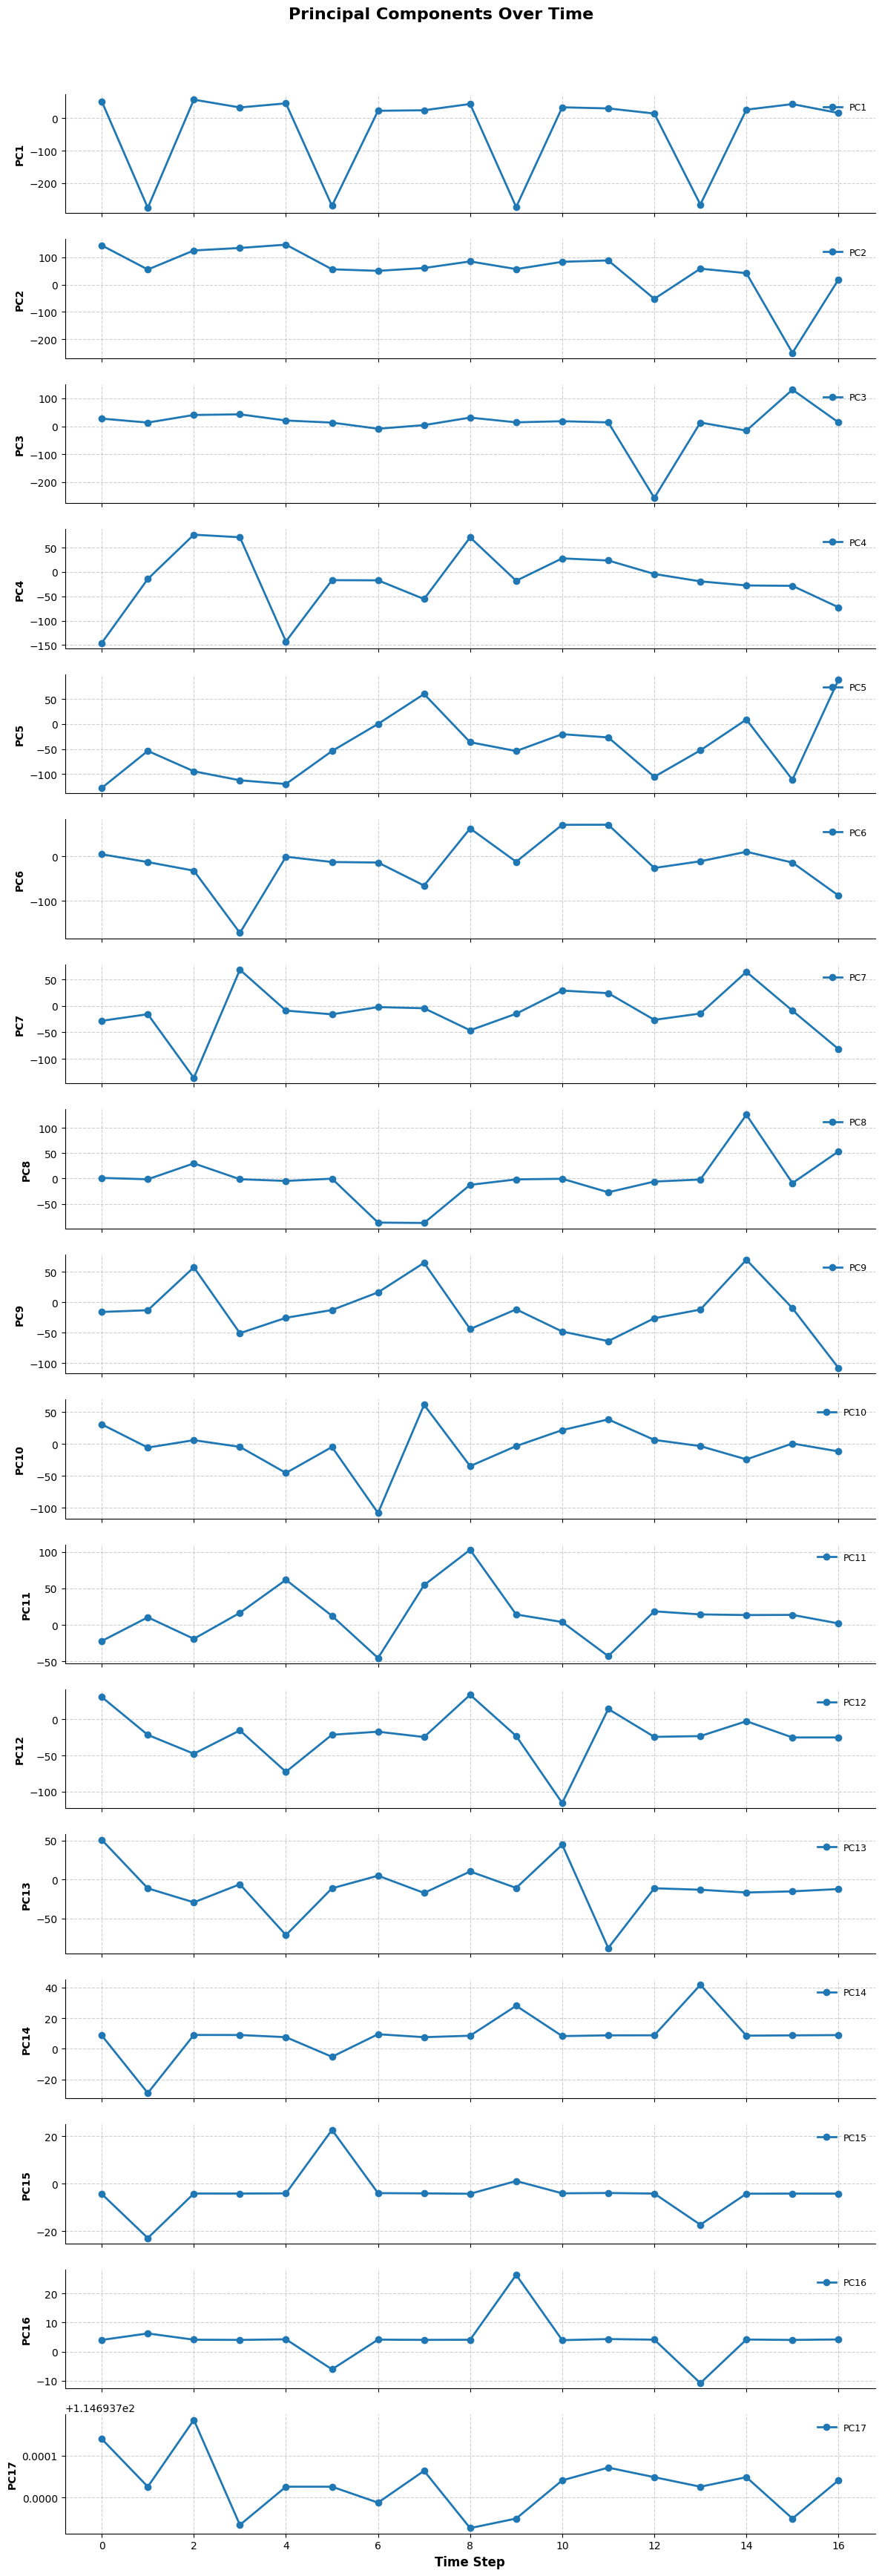

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating PCA output (Replace with actual data_pca_torch)
np.random.seed(42)
num_points = 17
num_pcs = 17  # Number of principal components
# data_pca_torch = np.cumsum(np.random.randn(num_points, num_pcs), axis=0)  # Simulated PCA output

# Extract all principal components
time_steps = np.arange(num_points)  # Assuming sequential time steps

# Create subplots for each PC with improved styling
fig, axes = plt.subplots(nrows=num_pcs, ncols=1, figsize=(12, 2 * num_pcs), sharex=True)

for i in range(num_pcs):
    axes[i].plot(time_steps, data_pca_torch[:, i], marker='o', linestyle='-', linewidth=2, markersize=6, label=f"PC{i+1}")
    axes[i].set_ylabel(f"PC{i+1}", fontsize=10, fontweight="bold")
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(loc="upper right", fontsize=9, frameon=False)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Common X label
axes[-1].set_xlabel("Time Step", fontsize=12, fontweight="bold")

# Title with spacing
fig.suptitle("Principal Components Over Time", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

In [169]:
pc1 = data_pca_torch[2:-2, 5].numpy()  # First principal component
pc2 = data_pca_torch[2:-2, 3].numpy()  # Second principal component

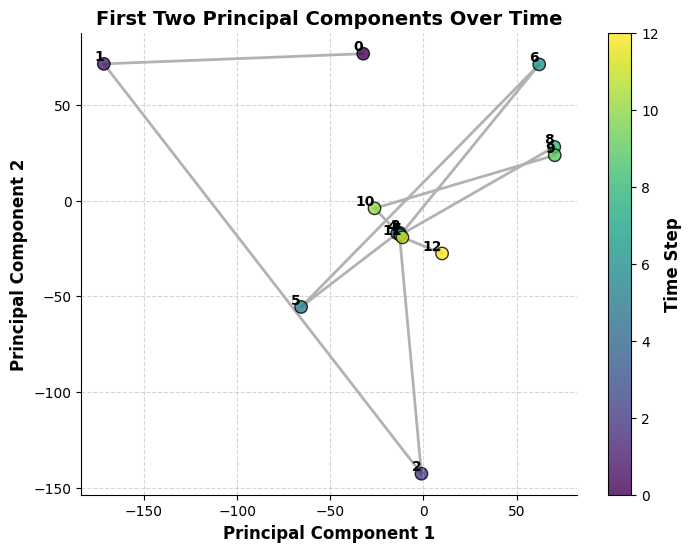

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating PCA output (Replace this with actual data_pca_torch)
np.random.seed(42)
num_points = 13
# pc1 = np.cumsum(np.random.randn(num_points))  # Simulated PC1 values
# pc2 = np.cumsum(np.random.randn(num_points))  # Simulated PC2 values
time_steps = np.arange(num_points)  # Time steps

# Create scatter plot with time encoded as color
plt.figure(figsize=(8, 6))
sc = plt.scatter(pc1, pc2, c=time_steps, cmap='viridis', edgecolors='k', alpha=0.8, s=80, linewidth=1)

# Draw a smooth line connecting points in order of time
plt.plot(pc1, pc2, linestyle='-', color='gray', alpha=0.6, linewidth=2, zorder=0)

# Number each point
for i, (x, y) in enumerate(zip(pc1, pc2)):
    plt.text(x, y, str(i), fontsize=10, ha='right', va='bottom', color='black', fontweight='bold')

# Add colorbar to show time progression
cbar = plt.colorbar(sc)
cbar.set_label('Time Step', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Principal Component 1", fontsize=12, fontweight="bold")
plt.ylabel("Principal Component 2", fontsize=12, fontweight="bold")
plt.title("First Two Principal Components Over Time", fontsize=14, fontweight="bold")

# Improve grid and aesthetics
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()